### Import library

In [1]:
import pandas as pd                               
import matplotlib.pyplot as plt                       
import seaborn as sns                                   
from sklearn.cluster import AgglomerativeClustering      
from scipy.cluster.hierarchy import dendrogram, linkage  

### Prepare Data

In [2]:
test_features = pd.read_csv('test_features.csv')
test_labels = pd.read_csv('test_labels.csv')
df = pd.concat([test_features,test_labels], axis=1)
df = df.sample(n=50, random_state=1)
y = df.Survived
df = df.drop('Survived', axis=1)
df.head(10)

,Pclass,Sex,Age,Fare,Family_size,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
114,1,1,29.699118,221.7792,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
85,1,1,71.000000,49.5042,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
97,3,1,45.000000,8.0500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
160,3,1,23.500000,7.2292,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
35,3,1,27.000000,14.4542,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
54,3,1,65.000000,7.7500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
124,3,1,25.000000,7.2500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
19,1,1,47.000000,52.0000,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
108,3,1,30.000000,9.5000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
125,1,1,35.000000,26.5500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Hierarchical Clustering

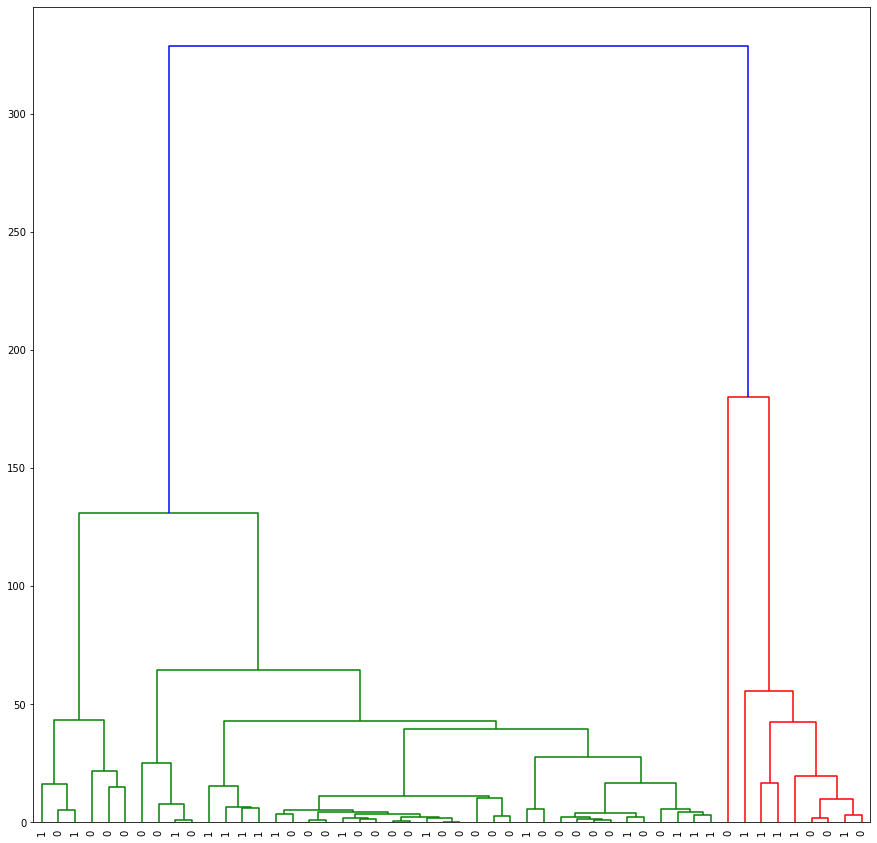

In [3]:
hc = linkage(df, method='ward', metric='euclidean')
fig = plt.figure(figsize=(15, 15))
dn = dendrogram(
    hc,
    leaf_label_func=lambda id: y.values[id],
    leaf_font_size=10)